In [1]:
from harvesters.core import Harvester
import matplotlib.pyplot as plt
import cv2
from time import sleep
harvester = Harvester()
cti_file= "C:\\Program Files\\MATRIX VISION\\mvIMPACT Acquire\\bin\\x64\\mvGenTLProducer.cti"
harvester.add_file(cti_file)
harvester.update()
 

In [2]:

ia = harvester.create_image_acquirer(0)

C:\Users\BETZLA~1\AppData\Local\Temp/ipykernel_17364/523310626.py:1: DeprecationWarning: please consider to use create() instead of create_image_acquirer().
  ia = harvester.create_image_acquirer(0)


In [6]:
images_in_video = 100

ia.num_buffers=images_in_video
ia.remote_device.node_map.AcquisitionFrameRate.value = images_in_video
ia.remote_device.node_map.ExposureTime.value = 1000000/images_in_video*.98
ia.remote_device.node_map.Gain.value = 4.0

In [7]:
ia.start()
images = []

# Fetch the images.
payloads=[]
for _ in range(ia.num_buffers):
    buffer = ia.fetch()
    payloads.append(buffer.payload)

# Stop the acquisition.
ia.stop()
images = []
for payload in payloads:
    _1d = payload.components[0].data
    images.append(_1d.reshape(payload.components[0].height, payload.components[0].width))

In [8]:
len(images)

100

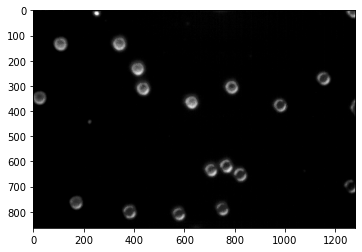

In [13]:
plt.imshow(images[1], cmap='gray')

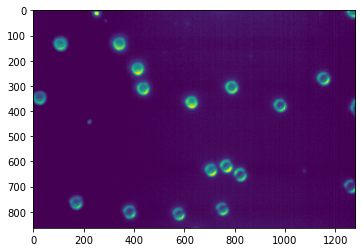

In [4]:

ia.remote_device.node_map.AcquisitionFrameRate.value = 10
ia.remote_device.node_map.ExposureTime.value = 10001.000
ia.remote_device.node_map.Gain.value = 4.0
sleep(1)
ia.start()
buffer = ia.fetch()
ia.stop()



_1d = buffer.payload.components[0].data
plt.imshow(_1d.reshape(buffer.payload.components[0].height, buffer.payload.components[0].width))

In [14]:
ia._queue.qsize()

0

In [10]:
ia.remote_device.node_map.AcquisitionFrameRate.unit

'Hz'

In [13]:
ia.remote_device.node_map.ExposureTime.unit

'uS'

In [23]:
ia.remote_device.node_map.

TypeError: 'NodeMap' object is not iterable

In [3]:

acq = harvester.create()

# Increase buffer size 
acq.num_buffers = 10
buffer_size = 4096 * 4096 # e.g. 4MP image
acq.remote_device.node_map.PayloadSize.value = buffer_size 

# Start acquisition
acq.start()

while True:
   buffer = acq.fetch()

   # Extract multiple images from buffer
   num_images = buffer.payload.num_images  
   for i in range(num_images):
       image = buffer.payload.get_image(i) 
       # Process image
       print(image.shape)

   buffer.queue()

AccessException: Node is not writable. : AccessException thrown in node 'PayloadSize' while calling 'PayloadSize.SetValue()' (file 'IntegerT.h', line 76)

In [5]:
acq.remote_device.node_map.PayloadSize.value

1105920

In [4]:
import inspect

def get_source_code_of_instance(instance):
    class_type = type(instance)
    try:
        source_code = inspect.getsource(class_type)
        return source_code
    except TypeError:
        return "No source code available for this object."

# Use it for your 'ia' instance:
source_code = get_source_code_of_instance(acq.remote_device.node_map)
print(source_code)


class NodeMap(object):
    thisown = property(lambda x: x.this.own(), lambda x, v: x.this.own(v), doc="The membership flag")
    __repr__ = _swig_repr

    def __init__(self, *args):
        _genapi.NodeMap_swiginit(self, _genapi.new_NodeMap(*args))
    __swig_destroy__ = _genapi.delete_NodeMap

    def load_xml_from_file(self, FileName):
        return _genapi.NodeMap_load_xml_from_file(self, FileName)

    def load_xml_from_string(self, XMLData):
        return _genapi.NodeMap_load_xml_from_string(self, XMLData)

    def load_xml_from_zip_file(self, ZipFileName):
        return _genapi.NodeMap_load_xml_from_zip_file(self, ZipFileName)

    def _get_device_name(self):
        return _genapi.NodeMap__get_device_name(self)

    def poll(self, ElapsedTime):
        return _genapi.NodeMap_poll(self, ElapsedTime)

    def _destroy(self):
        return _genapi.NodeMap__destroy(self)

    @staticmethod
    def clear_xml_cache():
        return _genapi.NodeMap_clear_xml_cache()

    def _get

In [6]:
print(get_source_code(ia))

No source code available for this object.


In [ ]:
ia= harvester.create_image_acquirer(0)

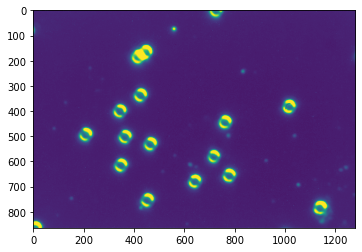

In [8]:
ia.remote_device.node_map.AcquisitionFrameRate.value = 5.0 
ia.remote_device.node_map.ExposureTime.value = 9998.000000*10
ia.remote_device.node_map.Gain.value = 2.0
sleep(1)
ia.start()
buffer = ia.fetch()
ia.stop()



_1d = buffer.payload.components[0].data
plt.imshow(_1d.reshape(buffer.payload.components[0].height, buffer.payload.components[0].width))

In [5]:
buffers=[]
ia.num_buffers = 5
ia.start()
for i in range(5):
    buffers.append(ia.fetch())
ia.stop()

In [24]:
ia.num_buffers = 10
ia.remote_device.node_map.AcquisitionMode.value = 'Continuous'

In [25]:
ia.start(run_as_thread=True)

c:\Users\BetzLab-Admin\anaconda3\lib\site-packages\harvesters\core.py:2314: DeprecationWarning: please consider to use timeout_period_on_client_fetch_call instead of timeout_on_client_fetch_call.
  timeout_on_client_fetch_call=self.timeout_on_client_fetch_call)


In [26]:
ia.stop() 

In [28]:
ia.data_streams[0].

In [33]:
import cv2 
import time

width = buffer.payload.components[0].width
height = buffer.payload.components[0].height

# Set up video writer
writer = cv2.VideoWriter('video.avi', cv2.VideoWriter_fourcc(*'MJPG'), 30, (width, height))

# Start acquisition
ia.start(run_as_thread=True) 

# Record for 10 seconds
recording = True
end_time = time.time() + 10
while time.time() < end_time:
    buffer = ia.fetch()
    image = buffer.payload.components[0].data
    writer.write(image)
    buffer.queue()

# Stop acquisition  
ia.stop()
writer.release()

c:\Users\BetzLab-Admin\anaconda3\lib\site-packages\harvesters\core.py:2314: DeprecationWarning: please consider to use timeout_period_on_client_fetch_call instead of timeout_on_client_fetch_call.
  timeout_on_client_fetch_call=self.timeout_on_client_fetch_call)


In [31]:
ia.stop() 

In [22]:
ia.num_filled_buffers_to_hold=3
ia.start()
buffer = ia.fetch()
ia.stop()
buffer.payload.components[0].data.shape

(1105920,)

In [36]:
ia.stop()

In [37]:
ia.num_buffers = 50
ia.remote_device.node_map.AcquisitionMode.value = 'MultiFrame'

InvalidArgumentException: Feature 'AcquisitionMode' : cannot convert value 'MultiFrame', the value is invalid. : InvalidArgumentException thrown in node 'AcquisitionMode' while calling 'AcquisitionMode.FromString()' (file 'Enumeration.cpp', line 134)

In [1]:
ia.tl_type 

NameError: name 'ia' is not defined

In [41]:
ia.start()
buffer = ia.fetch(timeout=5.0)
ia.stop()

In [45]:
help(ia.remote_device.node_map.AcquisitionMode)

Help on IEnumeration in module genicam.genapi object:

class IEnumeration(IValue)
 |  IEnumeration(*args, **kwargs)
 |  
 |  Method resolution order:
 |      IEnumeration
 |      IValue
 |      IBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self)
 |      Call self as a function.
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__ = _swig_repr(self)
 |  
 |  get_current_entry(self, Verify=False, IgnoreCache=False)
 |  
 |  get_entry(self, IntValue)
 |  
 |  get_entry_by_name(self, Symbolic)
 |  
 |  get_int_value(self, Verify=False, IgnoreCache=False)
 |  
 |  get_value(self, verify=False, ignore_cache=False)
 |  
 |  set_int_value(self, Value, Verify=True)
 |  
 |  set_value(self, value, verify=True)
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  entries
 |  
 |  symbolics
 |  
 |  -----------------

In [43]:
1280*864

1105920

In [8]:
ia.data_streams[0].

AttributeError: 

In [3]:
frames = []
# Capture settings
num_frames = 10  # Number of frames to capture for video

for i in range(num_frames):
    ia.start()
    buffer = ia.fetch()
    ia.stop()
    frame = buffer.payload.components[0].data.reshape(buffer.payload.components[0].height, buffer.payload.components[0].width)
    frames.append(frame)

In [12]:
ia.start()
ia._create_acquisition_thread()
buffer1 = ia.fetch()
buffer2 = ia.fetch()
buffer3 = ia.fetch()

ia.stop()

NameError: name '_ImageAcquisitionThread' is not defined

In [14]:
help(ia)

Help on ImageAcquirer in module harvesters.core object:

class ImageAcquirer(builtins.object)
 |  ImageAcquirer(*, parent: 'Harvester', device_proxy=None, config: 'Optional[ParameterSet]' = None, profiler=None, file_dict=None)
 |  
 |  Manages everything you need to acquire images from the connecting device.
 |  
 |  Methods defined here:
 |  
 |  __enter__(self)
 |  
 |  __exit__(self, exc_type, exc_val, exc_tb)
 |  
 |  __init__(self, *, parent: 'Harvester', device_proxy=None, config: 'Optional[ParameterSet]' = None, profiler=None, file_dict=None)
 |      Parameters
 |      ----------
 |      device_proxy : Device_
 |      sleep_duration : float
 |      file_path : str
 |          Set a path to camera description file which you want to load on
 |          the target node map instead of the one which the device declares.
 |      update_chunk_automatically : bool
 |          Set :const:`True` if you want to let the chunk data being updated
 |          when a buffer is newly fetched. :c

In [7]:
buffer1.payload.components[0].data==buffer2.payload.components[0].data

array([ True,  True,  True, ..., False, False,  True])

In [15]:
ia.start()
buffer = ia.fetch()
ia.stop()

In [24]:
help(ia.data_streams[0])

Help on DataStream in module harvesters.core object:

class DataStream(Module)
 |  DataStream(*, module: '_DataStream', parent=None)
 |  
 |  Represents a GenTL Data Stream module.
 |  
 |  Method resolution order:
 |      DataStream
 |      Module
 |      _Delegate
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *, module: '_DataStream', parent=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from Module:
 |  
 |  deregister_node_callback(self, token: 'int')
 |  
 |  deregister_node_callbacks(self)
 |  
 |  register_node_callback(self, *, node_name: 'str', callback: 'Optional[Callable[[Node, Any], None]]', context: 'Optional[Any]' = None, callback_type: 'Optional[ECallbackType]' = <ECallbackType.cbPostOutsideLock: 2>) -> 'Union[None, int]'
 |  
 |  ----------------------------------------------------------------------
 |  Read

In [49]:
buffer.queue()

In [52]:
len(buffer.payload.components)

1

In [34]:
ia = h.create()

In [46]:
ia._queue.payload.components[0].data

AttributeError: 'Queue' object has no attribute 'payload'

In [10]:
from harvesters.util.pfnc import mono_location_formats, \
    rgb_formats, bgr_formats, \
    rgba_formats, bgra_formats

payload = buffer.payload
component = payload.components[0]
width = component.width
height = component.height
data_format = component.data_format

# Reshape the image so that it can be drawn on the VisPy canvas:
if data_format in mono_location_formats:
    content = component.data.reshape(height, width)
else:
    # The image requires you to reshape it to draw it on the
    # canvas:
    if data_format in rgb_formats or \
            data_format in rgba_formats or \
            data_format in bgr_formats or \
            data_format in bgra_formats:
        #
        content = component.data.reshape(
            height, width,
            int(component.num_components_per_pixel)  # Set of R, G, B, and Alpha
        )
        #
        if data_format in bgr_formats:
            # Swap every R and B:
            content = content[:, :, ::-1]

In [12]:
content.shape

(864, 1280)

In [9]:
import traceback

In [13]:
frames = []
num_frames = 100  # Number of frames to capture for video

# Start the acquisition

with ia.start().
Fetch an image either using the with statement for automatic buffer management or manually handling buffers using buffer.queue().
Stop the acquisition with ia.stop()
ia.stop()


Error type: <class 'AttributeError'>
Error during capture: 
Traceback (most recent call last):
  File "c:\Users\BetzLab-Admin\anaconda3\lib\site-packages\genicam\genapi.py", line 1920, in __getattr__
    return self.get_node(attribute)
  File "c:\Users\BetzLab-Admin\anaconda3\lib\site-packages\genicam\genapi.py", line 1851, in get_node
    return _genapi.NodeMap_get_node(self, key)
_genapi.LogicalErrorException: Node not existing

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\BETZLA~1\AppData\Local\Temp/ipykernel_14708/2000151394.py", line 11, in <module>
    if ia.remote_device.node_map.GevEventSelector.is_readable():
  File "c:\Users\BetzLab-Admin\anaconda3\lib\site-packages\genicam\genapi.py", line 1924, in __getattr__
    raise AttributeError from e
AttributeError



In [14]:
if hasattr(ia.remote_device.node_map, 'GevEventSelector'):
    print("GevEventSelector exists.")
    if ia.remote_device.node_map.GevEventSelector.is_readable():
        print("GevEventSelector is readable.")
        try:
            ia.remote_device.node_map.GevEventSelector = 'EventTransferEnd'
            print("Successfully set GevEventSelector to 'EventTransferEnd'.")
        except Exception as e:
            print(f"Error type: {type(e)}")
            print(f"Error during setup: {e}")
            print(traceback.format_exc())  # for a full traceback
    else:
        print("GevEventSelector is not readable.")
else:
    print("GevEventSelector does not exist.")


GevEventSelector does not exist.


In [5]:
# Stop the acquisition
ia.stop()

# Restore camera to continuous acquisition mode if desired
ia.remote_device.node_map.TriggerMode.value = 'Off'


In [12]:
# Create video from frames using OpenCV
height, width = frames[0].shape
fourcc = cv2.VideoWriter_fourcc(*'DIVX')  # or 'XVID', 'MP4V', 'MJPG' depending on the format you want
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (width, height), isColor=False)  # 20.0 is the FPS

for frame in frames:
    out.write(frame)

out.release()

In [13]:
out

< cv2.VideoWriter 000001D56BE3F1D0>

In [4]:
# List of attributes you're looking for
attributes_to_check =list(dir(ia.remote_device.node_map))
for attribute in attributes_to_check:
    try:
        if hasattr(ia.remote_device.node_map, attribute):
            if hasattr(getattr(ia.remote_device.node_map, attribute), 'value'):
                node_value = getattr(ia.remote_device.node_map, attribute).value
                print(f"{attribute}: {node_value}")
    except:
        
        pass


AcquisitionFrameRate: 5.0
AcquisitionMode: Continuous
AcquisitionSource: Live
AnalogLineSelector: Line0
AnalogLineStatus: 2.11181640625
AnalogLineThreshold: 0.0
AxisEnable: False
AxisSelector: X_axis
AxisStatus: 0.1469999998807907
AxisThreshold: 0.0
BlackLevel: 128.0
BlackLevelSelector: All
CameraState: Idle
DeviceFirmwareUpdateEnable: False
DeviceID: 0000262
DeviceManufacturerInfo: Mikrotron EoSens Quad 1.1S Camera
DeviceModelName: EoSens Quad1.1S
DeviceScanType: Areascan
DeviceSerialNumber: 0000262
DeviceTemperature: 53.625
DeviceTemperatureSelector: Sensor
DeviceUserID: 
DeviceVendorName: Mikrotron GmbH
DeviceVersion: 1.1.072
DeviceVersions: 16842824
DeviceVersionsSelector: Firmware
DisplayWhileRecordingFramerate: 15
ExposureMode: Timed
ExposureTime: 9998.0
FilterMode: Disabled
FixedPatternNoiseReduction: On
FrameDelay: 0
Gain: 2.0
GainSelector: AnalogAll
GammaMode: Disabled
GevCCP: ExclusiveAccess
GevCurrentDefaultGateway: 0
GevCurrentIPAddress: 2852004544
GevCurrentIPConfiguration